In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Weather_Data.csv")

In [3]:
data.head(5)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [4]:
data.shape

(99516, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

# Features description


Location---The common name of the location of the weather station

MinTemp---The minimum temperature in degrees celsius

MaxTemp---The maximum temperature in degrees celsius

Rainfall---The amount of rainfall recorded for the day in mm

Evaporation---The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine---The number of hours of bright sunshine in the day.

WindGustDir---The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed---The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am---Direction of the wind at 9am

WindDir3pm---Direction of the wind at 3pm

WindSpeed9am---Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm---Wind speed (km/hr) averaged oover 10 minutes prior to 3pm

Humidity9am---Humidity (percent) at 9am

Humidity3pm---Humidity (percent) at 3pm

Pressure9am---Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm---Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am---Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.

Cloud3pm---Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

Temp9am---Temperature (degrees C) at 9am

Temp3pm---Temperature (degrees C) at 3pm

RainToday---Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow---The target variable. Did it rain tomorrow?

In [6]:
data.nunique()

row ID           99516
Location            49
MinTemp            386
MaxTemp            500
Rainfall           601
Evaporation        327
Sunshine           145
WindGustDir         16
WindGustSpeed       67
WindDir9am          16
WindDir3pm          16
WindSpeed9am        43
WindSpeed3pm        44
Humidity9am        101
Humidity3pm        101
Pressure9am        536
Pressure3pm        536
Cloud9am            10
Cloud3pm            10
Temp9am            432
Temp3pm            491
RainToday            2
RainTomorrow         2
dtype: int64

In [7]:
data['Cloud3pm'].unique()

array([nan,  8.,  7.,  1.,  2.,  5.,  4.,  6.,  3.,  0.,  9.])

In [8]:
data.drop('row ID',axis=1,inplace=True)

In [9]:
data.shape

(99516, 22)

In [10]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,93036.000000,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,99516.000000
mean,12.176266,23.218513,2.353024,5.46132,7.615090,39.976966,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,0.224677
std,6.390882,7.115072,8.487866,4.16249,3.783008,13.581524,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,0.417372
min,-8.500000,-4.100000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,0.000000
25%,7.600000,17.900000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.80000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.40000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,0.000000
max,33.900000,48.100000,371.000000,86.20000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


# Exploratory data analysis

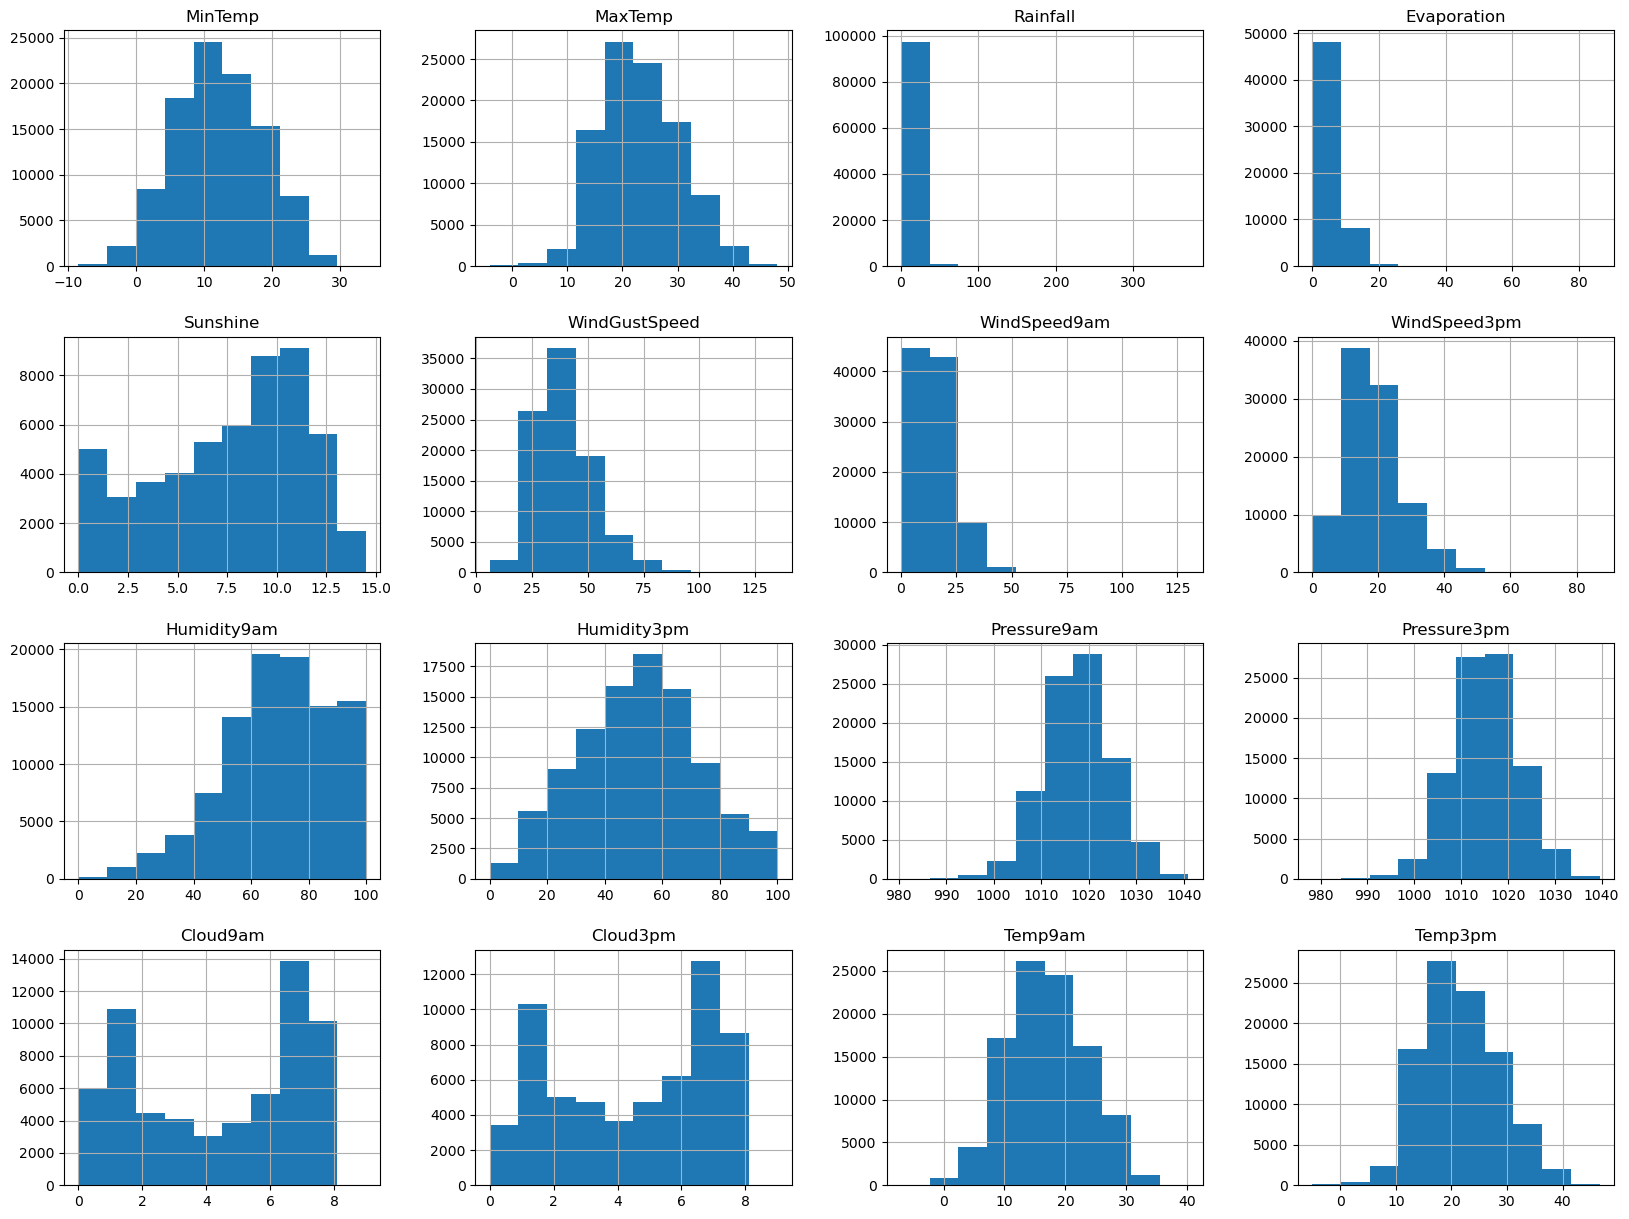

In [11]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()


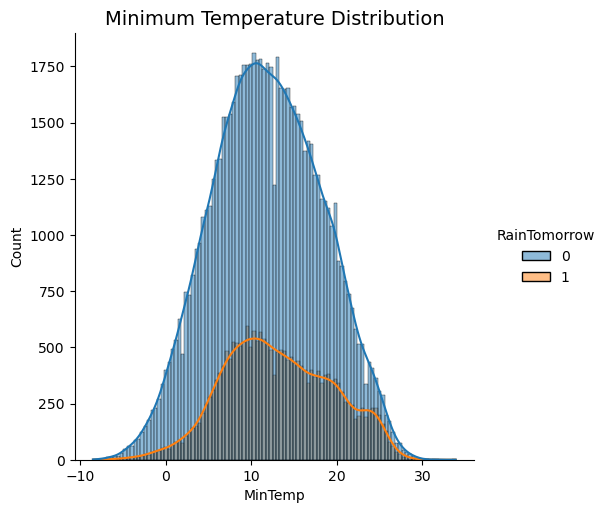

In [12]:
sns.displot(data, x="MinTemp", hue='RainTomorrow', kde=True)
plt.title("Minimum Temperature Distribution", fontsize = 14)
plt.show()

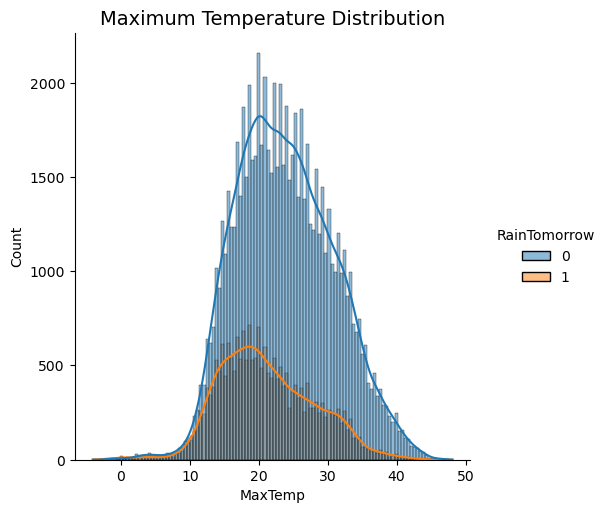

In [13]:
sns.displot(data, x="MaxTemp", hue='RainTomorrow', kde=True)
plt.title("Maximum Temperature Distribution", fontsize = 14)
plt.show()

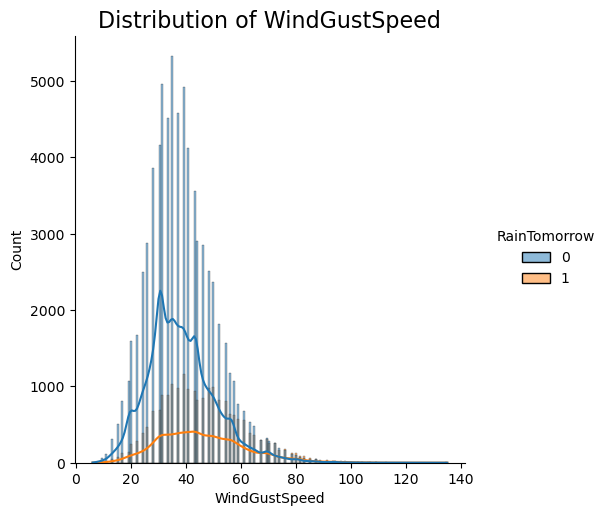

In [14]:
sns.displot(data,x='WindGustSpeed',hue='RainTomorrow',kde=True)
plt.title('Distribution of WindGustSpeed',fontsize=16)
plt.show()

<AxesSubplot:>

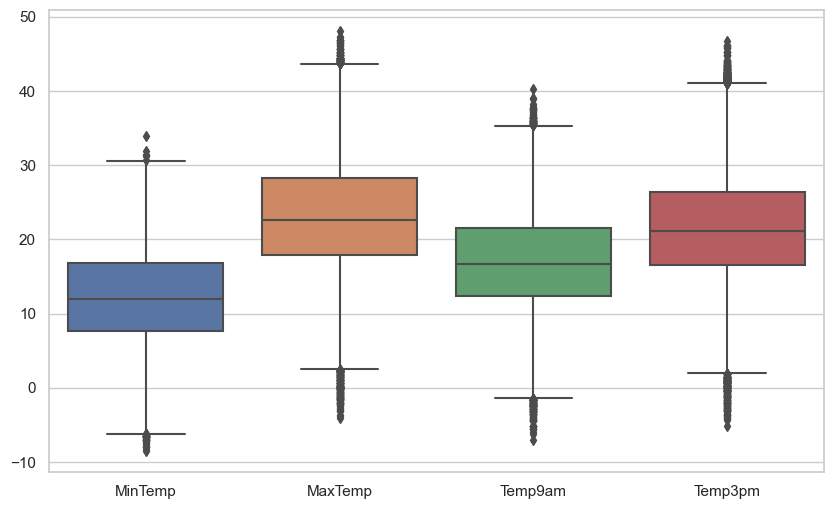

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['MinTemp','MaxTemp','Temp9am','Temp3pm']])


<AxesSubplot:>

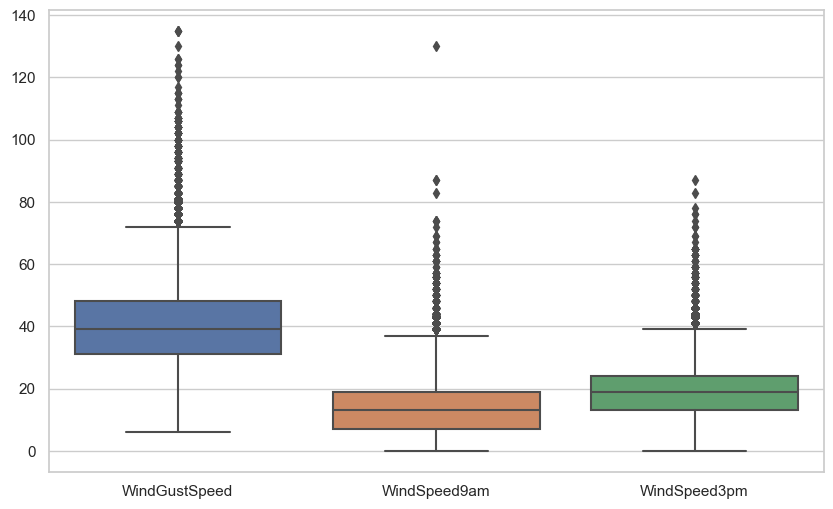

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']])



<AxesSubplot:>

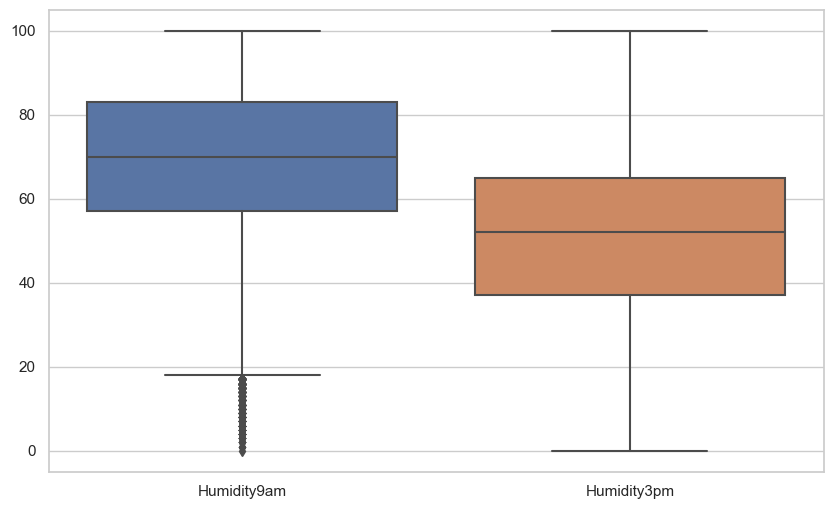

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Humidity9am','Humidity3pm']])



<AxesSubplot:>

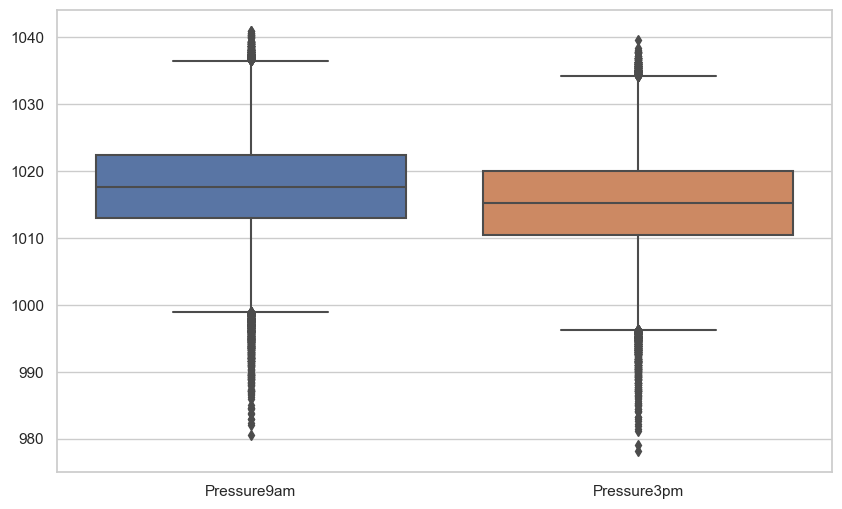

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Pressure9am','Pressure3pm']])


     
    

<AxesSubplot:>

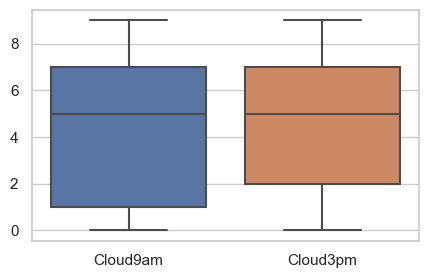

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.boxplot(data=data[['Cloud9am','Cloud3pm']])


<AxesSubplot:>

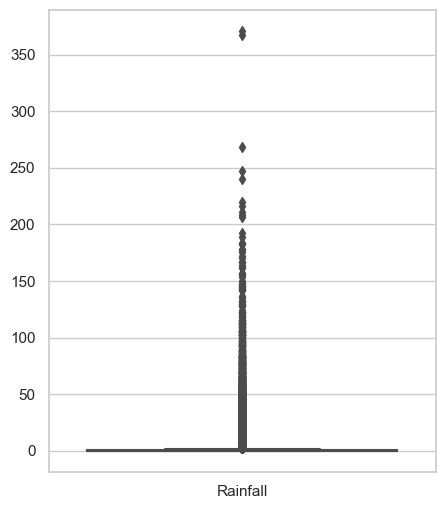

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=data[['Rainfall']])


<AxesSubplot:>

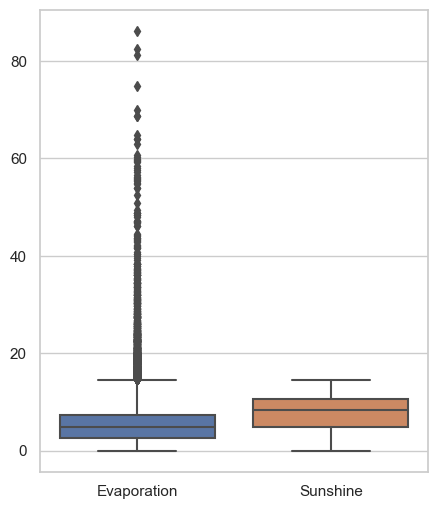

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=data[['Evaporation','Sunshine']])


<AxesSubplot:>

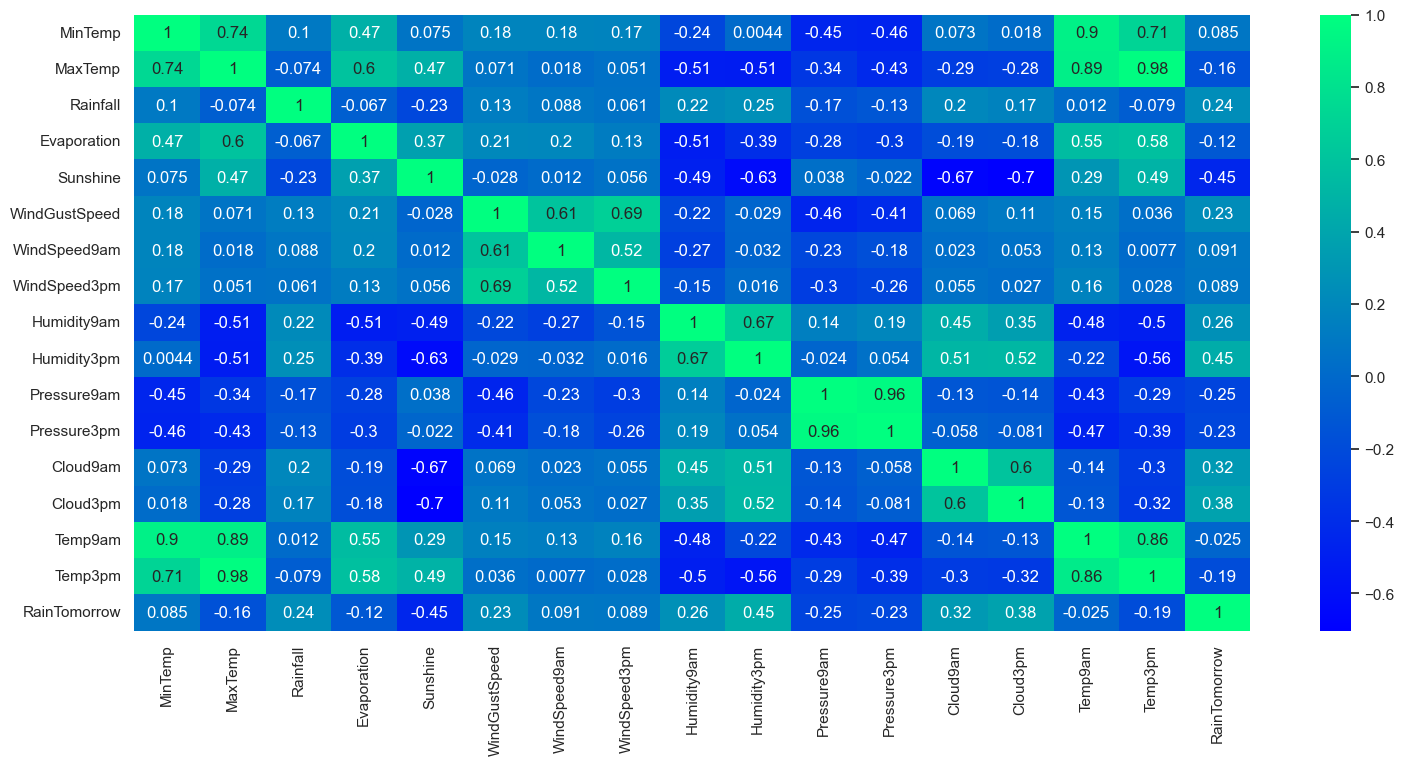

In [22]:
# Correlation Matrix
corr_matrix=data.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True,cmap='winter')

Highly positive correlated : MinTemp and MaxTemp , MinTemp and Temp9am , MinTemp and Temp3pm MaxTemp and Temp9am , MaxTemp and Temp3pm , Pressure9am and Pressure 3pm, Temp9am and Temp 3pm

Negatively correlated : Sunshine and Cloud9am , Sunshine and Cloud3pm

The columns MaxTemp,Evaporation,Sunshine,Pressure9am,Pressure3pm,Temp9am and Temp3pm have less negative correlation with the Target variable,'RainTomorrow'

In [23]:
data.isna().sum()

Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [24]:
# temp9am and temp 3pm highly correlated
#cloud 3pm and 9am
#pressure 3pm and 9am
#humidity 9am and 3 pm
#wing gust speed 9am and 3pm and wind gust speed
#evaporation and max temp
#max temp temp3pm

In [25]:
col=['Sunshine','Evaporation','Temp9am','Pressure9am','Cloud9am','Humidity9am','WindSpeed9am','WindSpeed3pm']

In [26]:
data.drop(col,axis=1,inplace=True)

In [27]:
data.shape

(99516, 14)

<AxesSubplot:>

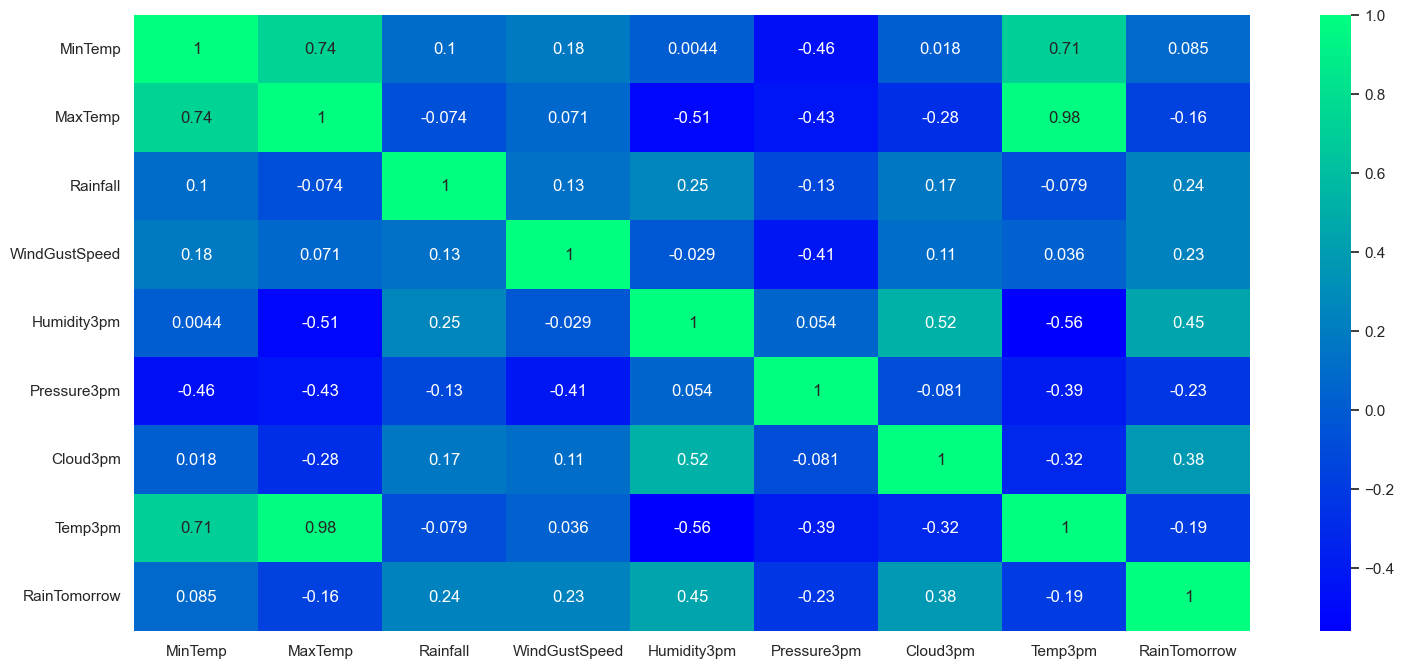

In [28]:
# Correlation Matrix
corr_matrix=data.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True,cmap='winter')

In [29]:
data.drop('Temp3pm',axis=1,inplace=True)

In [30]:
data.drop('Cloud3pm',axis=1,inplace=True)

# PREPROCESSING

In [31]:
# Filling missing values in Humidity3pm' with mean
data['Humidity3pm']=data['Humidity3pm'].fillna(data['Humidity3pm'].mean())

In [32]:
obj = data[['WindGustDir','WindDir9am','WindDir3pm']]
num= data[[ 'MinTemp','MaxTemp','Rainfall','WindGustSpeed','Pressure3pm']]   

In [33]:
for i in num:
   data[i].fillna(data[i].median(),inplace=True)

In [34]:
for i in obj:
   data[i].fillna(data[i].value_counts().index[0],inplace=True)

In [35]:
data.isna().sum()

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
Humidity3pm        0
Pressure3pm        0
RainToday        979
RainTomorrow       0
dtype: int64

In [36]:
# Column 'Raintoday' has 979 null values if we fill this with any other values, it may mislead our prediction so drop the null values 

In [37]:
data= data.dropna(subset=['RainToday'])

In [38]:
data.shape

(98537, 12)

In [39]:
data.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
Humidity3pm      0
Pressure3pm      0
RainToday        0
RainTomorrow     0
dtype: int64

<AxesSubplot:>

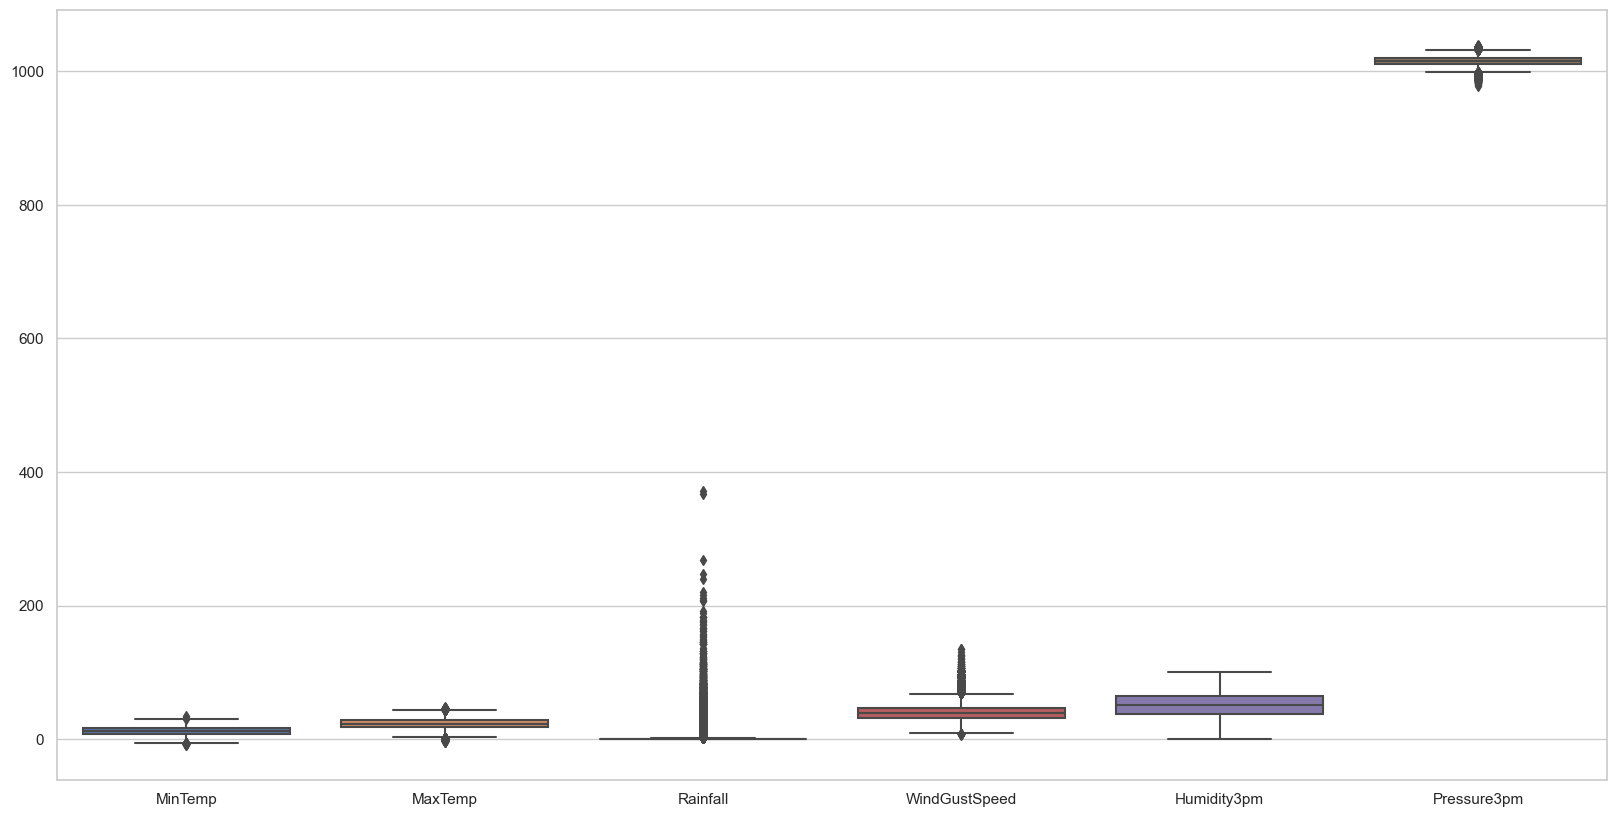

In [40]:
#Outliers we are checking only for numerical features
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[[ 'MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity3pm','Pressure3pm']])


In [41]:
for i in num:
 Q1=np.percentile(data[i],25)
 Q3=np.percentile(data[i],75)
 IQR=Q3-Q1
 low_lim=Q1-1.5*IQR
 up_lim=Q3+1.5*IQR
 outliers=[]
 for x in data[i]:
     if(x<low_lim)or(x>up_lim):
         outliers.append(x)
 data[i]=np.where(data[i]<low_lim,low_lim,np.where(data[i]>up_lim,up_lim,data[i]))

<AxesSubplot:>

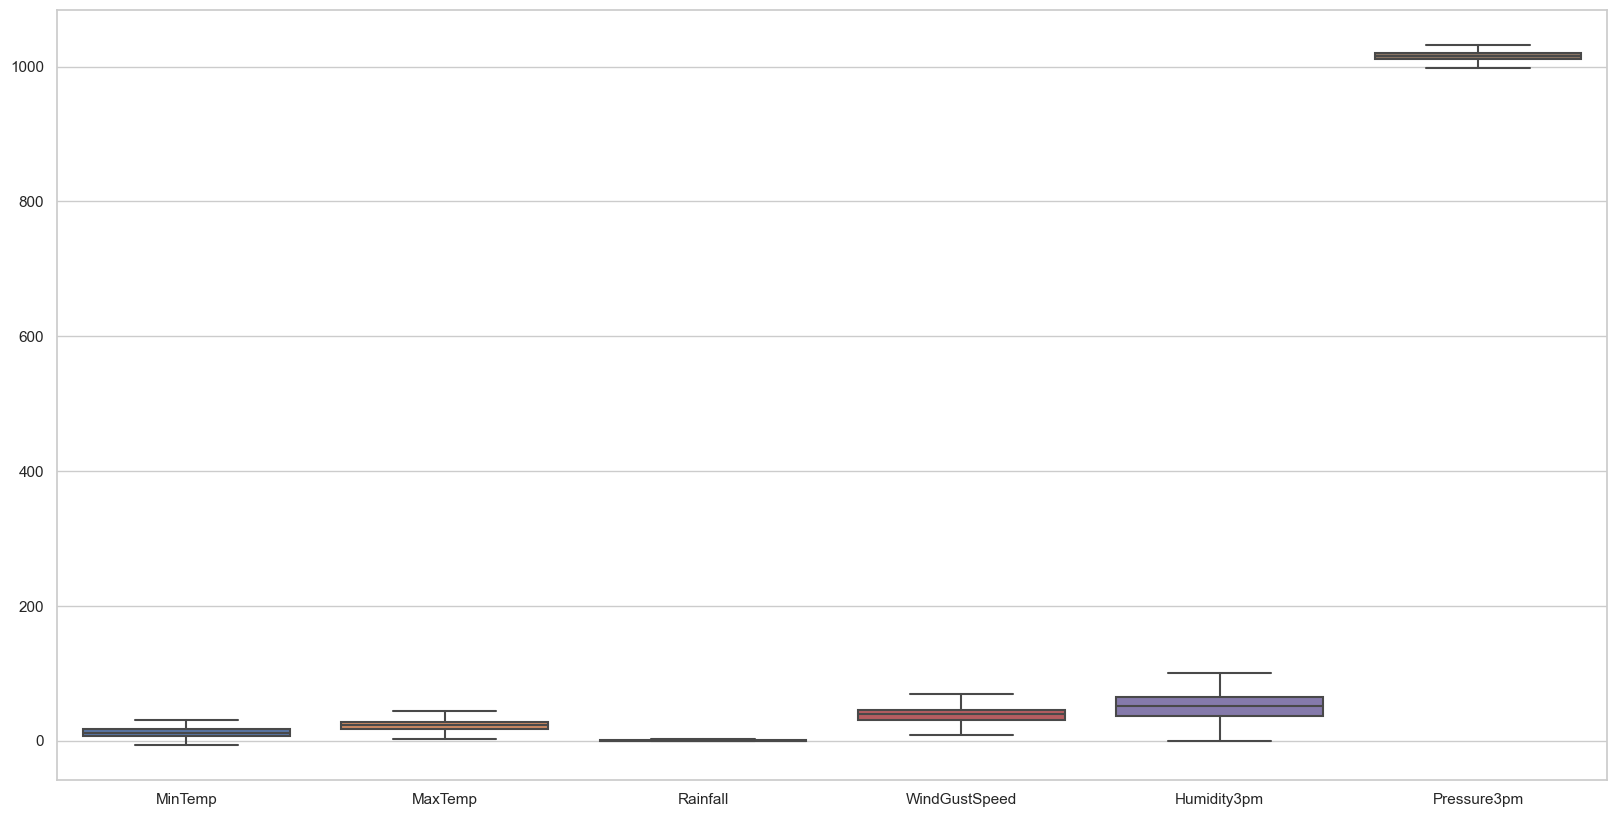

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[[ 'MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity3pm','Pressure3pm']])


In [43]:
# Label Encoding Location,WindDir3pm,WindGustDir and RainToday
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
data['Location']=lab_enc.fit_transform(data['Location'])
data['WindDir3pm']=lab_enc.fit_transform(data['WindDir3pm'])
data['WindDir9am']=lab_enc.fit_transform(data['WindDir9am'])
data['WindGustDir']=lab_enc.fit_transform(data['WindGustDir'])
data['RainToday']=lab_enc.fit_transform(data['RainToday'])

In [44]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,13,44.0,13,14,22.0,1007.1,0,0
1,2,7.4,25.1,0.0,14,44.0,6,15,25.0,1007.8,0,0
2,2,17.5,32.3,1.0,13,41.0,1,7,33.0,1006.0,0,0
3,2,14.6,29.7,0.2,14,56.0,13,13,23.0,1005.4,0,0
4,2,7.7,26.7,0.0,13,35.0,10,13,19.0,1010.1,0,0


<AxesSubplot:>

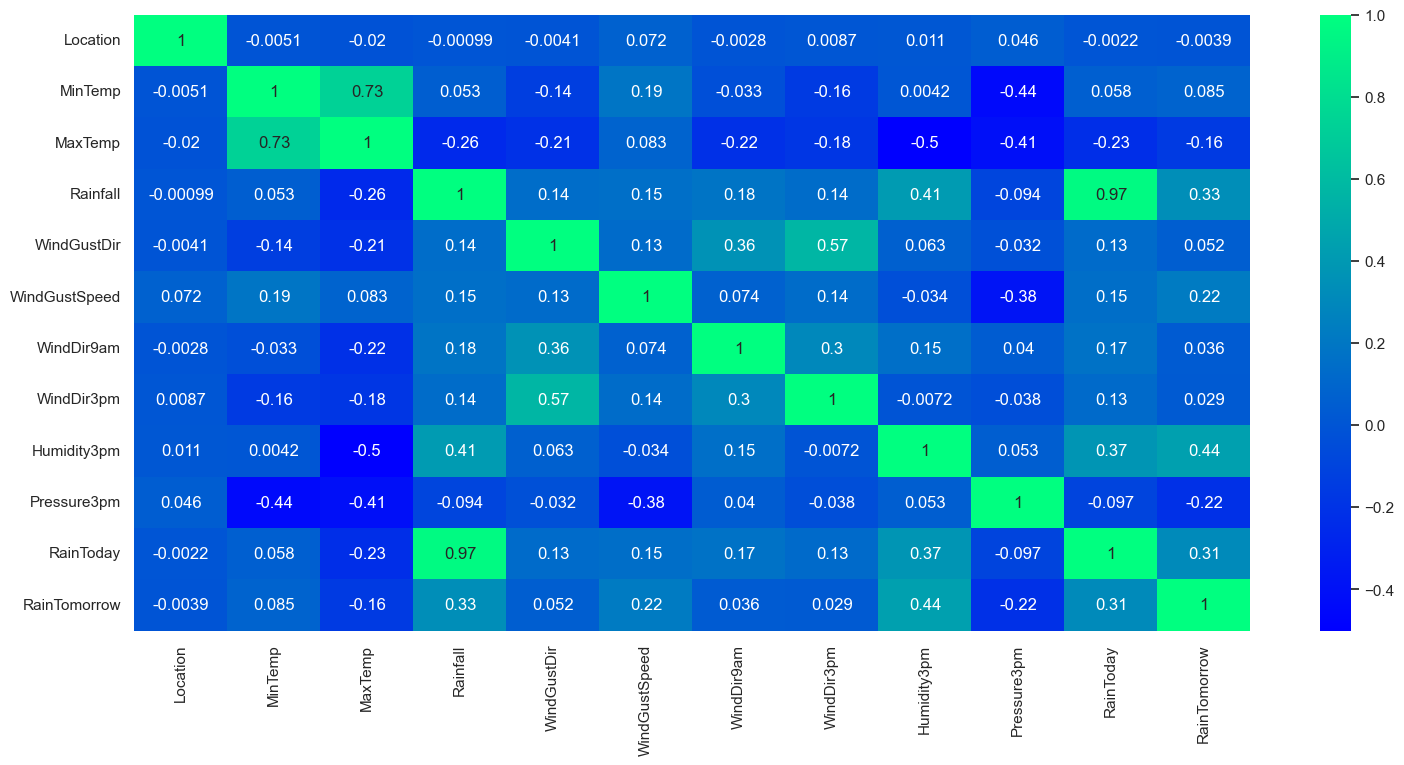

In [45]:
corr_matrix=data.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True,cmap='winter')

In [46]:
data.drop('Rainfall',axis=1,inplace=True)

<AxesSubplot:>

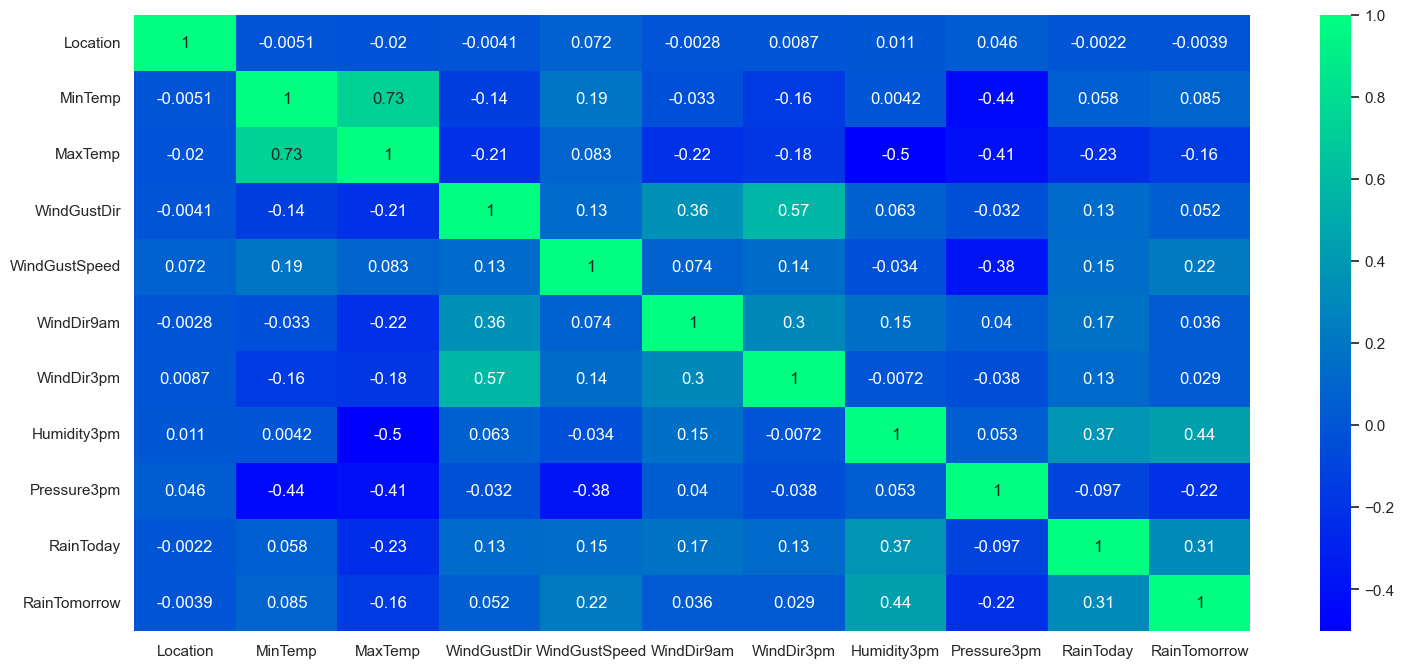

In [47]:
corr_matrix=data.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True,cmap='winter')

In [48]:
data.drop('MinTemp',axis=1,inplace=True)

In [49]:
data.shape

(98537, 10)

In [50]:
data

,Location,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
0,2,22.9,13,44.0,13,14,22.0,1007.1,0,0
1,2,25.1,14,44.0,6,15,25.0,1007.8,0,0
2,2,32.3,13,41.0,1,7,33.0,1006.0,0,0
3,2,29.7,14,56.0,13,13,23.0,1005.4,0,0
4,2,26.7,13,35.0,10,13,19.0,1010.1,0,0
...,...,...,...,...,...,...,...,...,...,...
99511,41,20.7,2,41.0,9,0,32.0,1024.3,0,0
99512,41,21.8,0,31.0,2,0,27.0,1021.2,0,0
99513,41,23.4,0,31.0,9,1,24.0,1020.3,0,0
99514,41,25.3,6,22.0,9,3,21.0,1019.1,0,0


<AxesSubplot:>

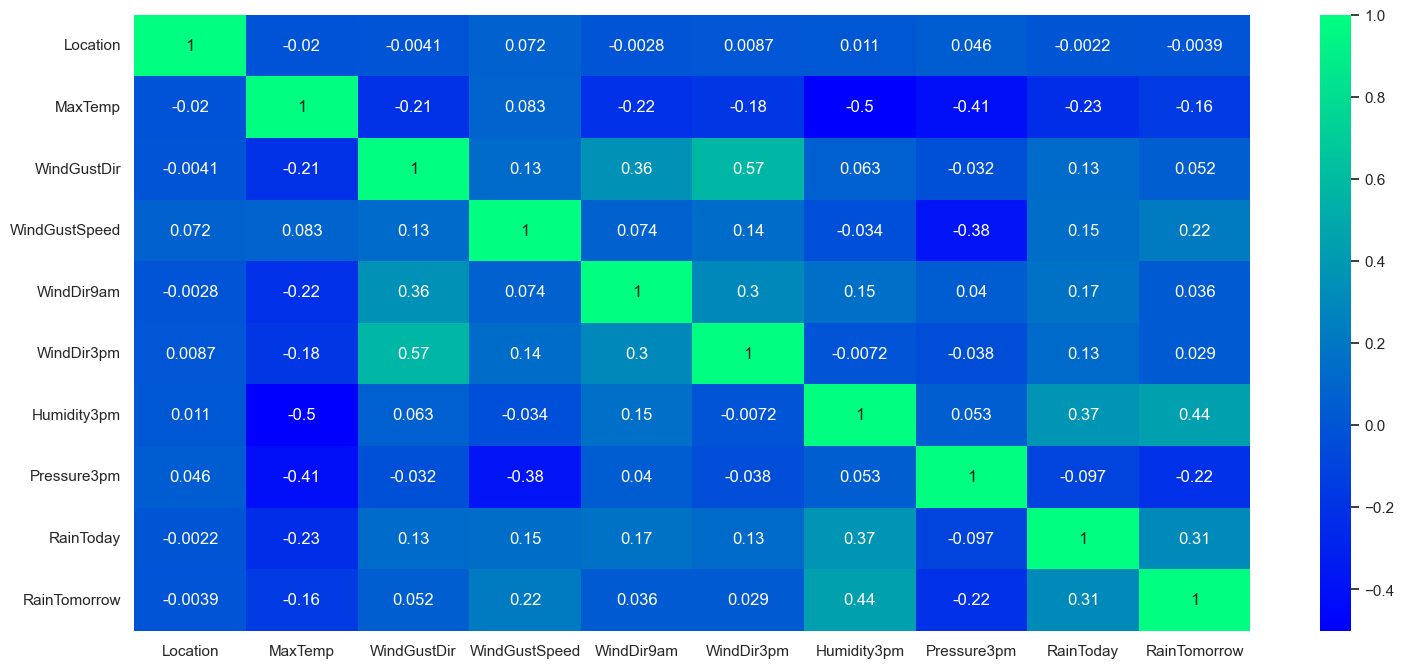

In [51]:
corr_matrix=data.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True,cmap='winter')

# standardisation

In [52]:
X=data.drop(['RainTomorrow'],axis=1)
y=data['RainTomorrow']

In [53]:
X

,Location,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,RainToday
0,2,22.9,13,44.0,13,14,22.0,1007.1,0
1,2,25.1,14,44.0,6,15,25.0,1007.8,0
2,2,32.3,13,41.0,1,7,33.0,1006.0,0
3,2,29.7,14,56.0,13,13,23.0,1005.4,0
4,2,26.7,13,35.0,10,13,19.0,1010.1,0
...,...,...,...,...,...,...,...,...,...
99511,41,20.7,2,41.0,9,0,32.0,1024.3,0
99512,41,21.8,0,31.0,2,0,27.0,1021.2,0
99513,41,23.4,0,31.0,9,1,24.0,1020.3,0
99514,41,25.3,6,22.0,9,3,21.0,1019.1,0


In [54]:
#Standard Scaling 
from sklearn.preprocessing import StandardScaler
std_scl=StandardScaler()

In [55]:
X1=X.drop(['Location','WindDir9am','WindDir3pm','WindGustDir','RainToday'],axis=1)


In [56]:
X1

,MaxTemp,WindGustSpeed,Humidity3pm,Pressure3pm
0,22.9,44.0,22.0,1007.1
1,25.1,44.0,25.0,1007.8
2,32.3,41.0,33.0,1006.0
3,29.7,56.0,23.0,1005.4
4,26.7,35.0,19.0,1010.1
...,...,...,...,...
99511,20.7,41.0,32.0,1024.3
99512,21.8,31.0,27.0,1021.2
99513,23.4,31.0,24.0,1020.3
99514,25.3,22.0,21.0,1019.1


In [57]:
X1=std_scl.fit_transform(X1)

In [58]:
X1

array([[-0.04628523,  0.36117782, -1.43241767, -1.24850836],
       [ 0.2641754 ,  0.36117782, -1.28625998, -1.14198655],
       [ 1.28022837,  0.11536766, -0.89650614, -1.41589977],
       ...,
       [ 0.024274  , -0.70399957, -1.33497921,  0.7601886 ],
       [ 0.29239909, -1.44143007, -1.4811369 ,  0.57757978],
       [ 0.51818864, -0.21237923, -1.33497921,  0.22757956]])

In [59]:
X1=pd.DataFrame(X1,columns=['MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm'])

In [60]:
X1

,MaxTemp,WindGustSpeed,Humidity3pm,Pressure3pm
0,-0.046285,0.361178,-1.432418,-1.248508
1,0.264175,0.361178,-1.286260,-1.141987
2,1.280228,0.115368,-0.896506,-1.415900
3,0.913320,1.344418,-1.383698,-1.507204
4,0.489965,-0.376253,-1.578575,-0.791986
...,...,...,...,...
98532,-0.356746,0.115368,-0.945225,1.368885
98533,-0.201516,-0.704000,-1.188822,0.897145
98534,0.024274,-0.704000,-1.334979,0.760189
98535,0.292399,-1.441430,-1.481137,0.577580


In [61]:
X=X.drop(['MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm'],axis=1)


In [62]:
X

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,2,13,13,14,0
1,2,14,6,15,0
2,2,13,1,7,0
3,2,14,13,13,0
4,2,13,10,13,0
...,...,...,...,...,...
99511,41,2,9,0,0
99512,41,0,2,0,0
99513,41,0,9,1,0
99514,41,6,9,3,0


In [63]:
X.index=X1.index

In [64]:
X=pd.concat([X,X1],axis=1)

In [65]:
X

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,MaxTemp,WindGustSpeed,Humidity3pm,Pressure3pm
0,2,13,13,14,0,-0.046285,0.361178,-1.432418,-1.248508
1,2,14,6,15,0,0.264175,0.361178,-1.286260,-1.141987
2,2,13,1,7,0,1.280228,0.115368,-0.896506,-1.415900
3,2,14,13,13,0,0.913320,1.344418,-1.383698,-1.507204
4,2,13,10,13,0,0.489965,-0.376253,-1.578575,-0.791986
...,...,...,...,...,...,...,...,...,...
98532,41,2,9,0,0,-0.356746,0.115368,-0.945225,1.368885
98533,41,0,2,0,0,-0.201516,-0.704000,-1.188822,0.897145
98534,41,0,9,1,0,0.024274,-0.704000,-1.334979,0.760189
98535,41,6,9,3,0,0.292399,-1.441430,-1.481137,0.577580


In [66]:
data.isna().sum()

Location         0
MaxTemp          0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
Humidity3pm      0
Pressure3pm      0
RainToday        0
RainTomorrow     0
dtype: int64

In [67]:
X.describe()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,MaxTemp,WindGustSpeed,Humidity3pm,Pressure3pm
count,98537.000000,98537.000000,98537.000000,98537.000000,98537.000000,9.853700e+04,9.853700e+04,9.853700e+04,9.853700e+04
mean,23.732943,8.053696,6.999523,7.789186,0.223835,-1.062514e-15,8.974521e-15,-3.335507e-15,3.378439e-14
std,14.220467,4.689441,4.517421,4.552830,0.416815,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.932158e+00,-2.547576e+00,-2.504241e+00,-2.595248e+00
25%,11.000000,4.000000,3.000000,4.000000,0.000000,-7.518776e-01,-7.039996e-01,-7.016292e-01,-6.550297e-01
50%,24.000000,9.000000,7.000000,8.000000,0.000000,-8.862077e-02,-4.850579e-02,1.549811e-03,-6.814604e-04
75%,36.000000,13.000000,11.000000,12.000000,0.000000,7.016427e-01,5.250513e-01,6.625092e-01,6.384494e-01
max,48.000000,15.000000,15.000000,15.000000,1.000000,2.881923e+00,2.368628e+00,2.367682e+00,2.578668e+00


# modeling

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)


# Creating Logistic Regression Model

In [70]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model=logit_model.fit(X_train,y_train)
y_pred_logit=logit_model.predict(X_test)

In [71]:

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import classification_report



In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [73]:
confusion_matrix(y_test,y_pred_logit)

array([[14481,   819],
       [ 2366,  2042]], dtype=int64)

In [74]:
print('Accuracy score is :',accuracy_score(y_test,y_pred_logit))

Accuracy score is : 0.8383905013192612


In [75]:
precision_score(y_test,y_pred_logit)

0.7137364557846907

In [76]:
recall_score(y_test,y_pred_logit)

0.4632486388384755

In [77]:
f1_score(y_test,y_pred_logit)

0.5618379419452469

In [78]:
print(classification_report(y_test,y_pred_logit))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     15300
           1       0.71      0.46      0.56      4408

    accuracy                           0.84     19708
   macro avg       0.79      0.70      0.73     19708
weighted avg       0.83      0.84      0.83     19708



# Creating KNN Model

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
metric_k=[]
neighbors=range(3,15)

for k in neighbors:
     classifier=KNeighborsClassifier(n_neighbors=k)
     kNN_model=classifier.fit(X_train,y_train)
     y_pred_kNN=kNN_model.predict(X_test)
     acc=accuracy_score(y_test,y_pred_kNN)
     metric_k.append(acc)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

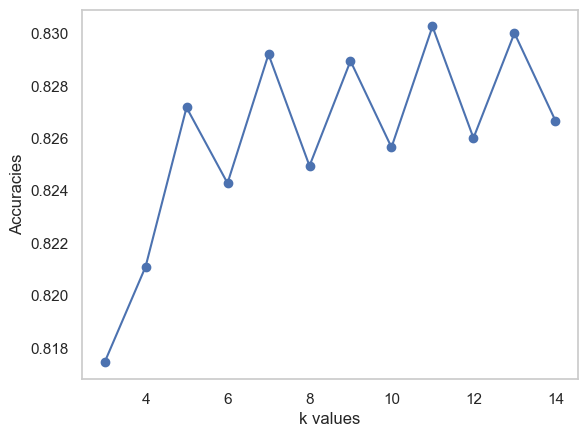

In [81]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [82]:
accuracy_score(y_test,y_pred_kNN)

0.8266693728435153

In [83]:
classifier=KNeighborsClassifier(n_neighbors=11)
kNN_model=classifier.fit(X_train,y_train)
y_pred_kNN=kNN_model.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [84]:
confusion_matrix(y_test,y_pred_kNN)

array([[14791,   509],
       [ 2836,  1572]], dtype=int64)

In [85]:


accuracy_score(y_test,y_pred_kNN)

0.8302719707732901

In [86]:
precision_score(y_test,y_pred_kNN)

0.7554060547813551

In [87]:
recall_score(y_test,y_pred_kNN)

0.3566243194192377

In [88]:
f1_score(y_test,y_pred_kNN)

0.4845122515025428

In [89]:
print('classification_report :\n',classification_report(y_test,y_pred_kNN))

classification_report :
               precision    recall  f1-score   support

           0       0.84      0.97      0.90     15300
           1       0.76      0.36      0.48      4408

    accuracy                           0.83     19708
   macro avg       0.80      0.66      0.69     19708
weighted avg       0.82      0.83      0.81     19708



# Creating SVM(Kernel='Linear')Model

In [90]:
from sklearn.svm import SVC

In [91]:
svm_clf=SVC(kernel='linear')

In [92]:
#svm_clf=svm_clf.fit(X_train,y_train)
#y_pred_svm=svm_clf.predict(X_test)

In [93]:
#accuracy_score(y_test,y_pred_svm)

# Creating SVM(Kernel='rbf')Model

In [94]:
#svm_clf2=SVC(kernel='rbf')
#svm_clf2=svm_clf2.fit(X_train,y_train)
#y_pred_svm2=svm_clf2.predict(X_test)

In [95]:
#accuracy_score(y_test,y_pred_svm2)

# Creating DecisionTreeClassifier Model

In [96]:
X=data.drop(['RainTomorrow'],axis=1)
y=data['RainTomorrow']

In [97]:
# Splitting into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(X_train,y_train)
y_pred_dt=dt_clf.predict(X_test)

In [100]:
confusion_matrix(y_test,y_pred_dt)

array([[13055,  2245],
       [ 2100,  2308]], dtype=int64)

In [101]:
accuracy_score(y_test,y_pred_dt)

0.7795311548609701

In [102]:
precision_score(y_test,y_pred_dt)

0.5069185152646607

In [103]:
recall_score(y_test,y_pred_dt)

0.5235934664246824

In [104]:
f1_score(y_test,y_pred_dt)

0.5151210802365808

In [105]:
print('classification_report :\n',classification_report(y_test,y_pred_dt))

classification_report :
               precision    recall  f1-score   support

           0       0.86      0.85      0.86     15300
           1       0.51      0.52      0.52      4408

    accuracy                           0.78     19708
   macro avg       0.68      0.69      0.69     19708
weighted avg       0.78      0.78      0.78     19708



# Creating RandomForestClassifier Model 

In [106]:
from sklearn.ensemble import RandomForestClassifier


In [107]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)

In [108]:
accuracy_score(y_test,y_pred_rf)

0.8490968134767607

In [109]:
confusion_matrix(y_test,y_pred_rf)

array([[14533,   767],
       [ 2207,  2201]], dtype=int64)

In [110]:
precision_score(y_test,y_pred_rf)

0.741576819407008

In [111]:
f1_score(y_test,y_pred_rf)

0.5968004338394793

In [112]:
print('classification_report :\n',classification_report(y_test,y_pred_rf))

classification_report :
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     15300
           1       0.74      0.50      0.60      4408

    accuracy                           0.85     19708
   macro avg       0.80      0.72      0.75     19708
weighted avg       0.84      0.85      0.84     19708



In [113]:
import pickle

In [114]:
pickle.dump(rf_clf,open('model1.pkl','wb') )

In [115]:
model1=pickle.load(open('model1.pkl','rb'))

In [116]:
X_test

,Location,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,RainToday
89498,15,11.0,6,68.5,6,6,63.0,998.25,0
84439,31,25.3,11,28.0,1,12,54.0,1017.00,0
62789,14,26.7,10,61.0,10,10,65.0,1014.30,1
19179,34,15.6,4,13.0,3,14,65.0,1027.80,0
94987,3,30.0,3,43.0,0,5,18.0,1012.20,0
...,...,...,...,...,...,...,...,...,...
39752,6,42.6,3,44.0,6,6,13.0,1010.70,0
94770,3,38.3,9,33.0,2,8,12.0,1008.20,0
23720,38,21.2,11,68.5,11,12,79.0,1019.20,0
83102,31,21.5,12,41.0,0,12,38.0,1021.10,0


In [117]:
y_test

89498    1
84439    0
62789    0
19179    0
94987    0
        ..
39752    0
94770    0
23720    1
83102    0
84100    0
Name: RainTomorrow, Length: 19708, dtype: int64

In [118]:
print(model1.predict([[15,11.0,6,68.5,6,6,63.0,998.25,0]]))

[1]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [119]:
print(model1.predict([[14,26.7,10,61.0,10,10,65.0,1014.30,1]]))

[1]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [120]:
print(model1.predict([[38,21.2,11,68.5,11,12,79.0,1019.20,0]]))

[1]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [121]:
print(model1.predict([[2,30.4,3,30.0,10,2,22.0,1008.7,0]]))

[1]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Fine Tuning RandomForestClassifier Model

In [122]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [123]:
parameters={'n_estimators':[50,100,150,250],'max_depth':[3,6,9,None]}

 # Hyperparameter Tuning-GridSearchCV

In [124]:

grid_model=GridSearchCV(RandomForestClassifier(),parameters,scoring='f1')
grid_model.fit(X_train,y_train)
print(grid_model.best_params_)

{'max_depth': None, 'n_estimators': 250}


In [125]:
model_grid=RandomForestClassifier(n_estimators=250,max_depth=None)
rf_grid=model_grid.fit(X_train,y_train)
y_pred_grid=rf_grid.predict(X_test)

In [126]:
accuracy_score(y_test,y_pred_grid)


0.8476760706312158

In [127]:
f1_score(y_test,y_pred_grid)

0.5957446808510638

In [128]:
print('classification_report :\n',classification_report(y_test,y_pred_grid))

classification_report :
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     15300
           1       0.73      0.50      0.60      4408

    accuracy                           0.85     19708
   macro avg       0.80      0.72      0.75     19708
weighted avg       0.84      0.85      0.84     19708



In [129]:
pickle.dump(rf_grid,open('model2.pkl','wb') )

In [130]:
model2=pickle.load(open('model2.pkl','rb'))

In [131]:
print(model2.predict([[15,11.0,6,68.5,6,6,63.0,998.25,0]]))

[1]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [132]:
print(model2.predict([[14,26.7,10,61.0,10,10,65.0,1014.30,1]]))

[1]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [133]:
print(model2.predict([[38,21.2,11,68.5,11,12,79.0,1019.20,0]]))

[1]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [134]:
print(model2.predict([[2,30.4,3,30.0,10,2,22.0,1008.7,0]]))

[1]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Hyperparameter Tuning-RandomizedSearchCV


In [135]:
random_model=RandomizedSearchCV(RandomForestClassifier(),parameters,scoring='f1')
random_model.fit(X_train,y_train)
print(random_model.best_params_)

{'n_estimators': 250, 'max_depth': None}


In [136]:
model_random=RandomForestClassifier(n_estimators=250,max_depth=None)
rf_random=model_random.fit(X_train,y_train)
y_pred_random=rf_random.predict(X_test)

In [137]:
accuracy_score(y_test,y_pred_random)

0.8494012583722347

In [138]:
f1_score(y_test,y_pred_random)

0.5996762881035878

In [139]:
print('classification_report :\n',classification_report(y_test,y_pred_random))

classification_report :
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     15300
           1       0.74      0.50      0.60      4408

    accuracy                           0.85     19708
   macro avg       0.80      0.73      0.75     19708
weighted avg       0.84      0.85      0.84     19708



In [140]:
pickle.dump(rf_random,open('model3.pkl','wb') )

In [141]:
model3=pickle.load(open('model3.pkl','rb'))

In [142]:
print(model3.predict([[15,11.0,6,68.5,6,6,63.0,998.25,0]]))

[1]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [143]:
print(model3.predict([[14,26.7,10,61.0,10,10,65.0,1014.30,1]]))

[0]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [144]:
print(model3.predict([[38,21.2,11,68.5,11,12,79.0,1019.20,0]]))

[1]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [145]:
print(model3.predict([[2,30.4,3,30.0,10,2,22.0,1008.7,0]]))

[1]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
